Ops Analytics

This notebook is to investigate perf data for feature engineering.

In [22]:
import os
import tarfile
import urllib
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix

In [82]:
file_path = os.path.join("datasets", "sqlops_telemetry","")

def load_data(data_path = file_path, csv_file="dbo.carbonPerf.csv"):
    csv_path = os.path.join(data_path, csv_file)
    return pd.read_csv(csv_path)

ops_df = load_data(file_path)
valid_attributes = ["Platform", "AppVersion", "TotalMemory", "CPUCount", "Ellapsed"]
ops_df = ops_df[valid_attributes]
ops_df.dropna(subset=["Ellapsed"], inplace=True)
positive_value_indices = np.where(ops_df["Ellapsed"]>0)
ops_df = ops_df.iloc[positive_value_indices]
ops_df["Ellapsed"].where(ops_df["Ellapsed"] < 20000, 20000.0, inplace=True)
ops_df["TotalMemory"] = np.ceil(ops_df["TotalMemory"] / (1024**3))
ops_df["TotalMemory"].where(ops_df["TotalMemory"] < 256, 256, inplace=True)
#ops_df["CPUCount"].where(ops_df["CPUCount"] < 20, 20.0, inplace=True )
ops_df["CPUCount"] = np.ceil(ops_df["CPUCount"])
stack = ops_df[["Platform", "AppVersion"]].stack()
ops_df[["Platform", "AppVersion"]] = pd.Series(stack.factorize()[0], index=stack.index).unstack()

linux_indices = np.where(ops_df["Platform"]==7)
linux_df = ops_df.iloc[linux_indices]

windows_indices= np.where(ops_df["Platform"]==12)
windows_df = ops_df.iloc[windows_indices]

mac_indices = np.where(ops_df["Platform"]==0)
mac_df = ops_df.iloc[mac_indices]

In [83]:
linux_df.describe()

,Platform,AppVersion,TotalMemory,CPUCount,Ellapsed
count,63768.0,63768.000000,63768.000000,63768.000000,63768.000000
mean,7.0,3.161272,13.626333,6.121566,5165.185704
std,0.0,1.929796,5.622469,2.127205,4228.507463
min,7.0,1.000000,2.000000,2.000000,872.000000
25%,7.0,2.000000,8.000000,4.000000,2643.000000
50%,7.0,2.000000,16.000000,8.000000,3782.000000
75%,7.0,5.000000,16.000000,8.000000,5688.000000
max,7.0,26.000000,128.000000,24.000000,20000.000000


In [84]:
windows_df.describe()

,Platform,AppVersion,TotalMemory,CPUCount,Ellapsed
count,108442.0,108442.000000,108442.000000,108442.000000,108442.000000
mean,12.0,3.274755,14.961583,5.678824,9780.465742
std,0.0,2.076143,12.441709,3.036073,6274.011312
min,12.0,1.000000,1.000000,1.000000,41.000000
25%,12.0,2.000000,8.000000,4.000000,4152.000000
50%,12.0,2.000000,16.000000,4.000000,8467.000000
75%,12.0,6.000000,16.000000,8.000000,14830.000000
max,12.0,28.000000,256.000000,60.000000,20000.000000


In [85]:
mac_df.describe()

,Platform,AppVersion,TotalMemory,CPUCount,Ellapsed
count,11976.0,11976.000000,11976.000000,11976.000000,11976.000000
mean,0.0,2.959419,11.885855,4.841767,6586.430862
std,0.0,1.928541,8.325933,2.507561,5962.602128
min,0.0,1.000000,1.000000,1.000000,786.000000
25%,0.0,2.000000,8.000000,4.000000,2349.000000
50%,0.0,2.000000,8.000000,4.000000,3618.000000
75%,0.0,4.000000,16.000000,4.000000,9356.000000
max,0.0,21.000000,126.000000,64.000000,20000.000000


In [86]:
ops_df.head()

,Platform,AppVersion,TotalMemory,CPUCount,Ellapsed
0,0,1,4.0,2.0,20000.0
1,0,1,8.0,2.0,6156.0
2,0,1,16.0,8.0,1805.0
3,0,1,4.0,4.0,11935.0
4,0,1,4.0,2.0,7364.0


In [87]:
ops_df["Ellapsed"].describe().apply(lambda x: format(x, 'f'))

count    184186.000000
mean       7974.905389
std        6037.828635
min          41.000000
25%        3135.000000
50%        5510.000000
75%       11456.000000
max       20000.000000
Name: Ellapsed, dtype: object

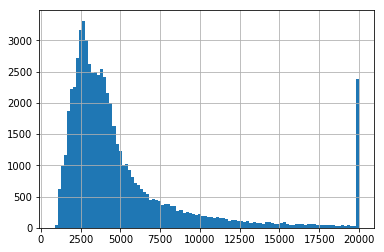

In [88]:
linux_df["Ellapsed"].hist(bins=100)

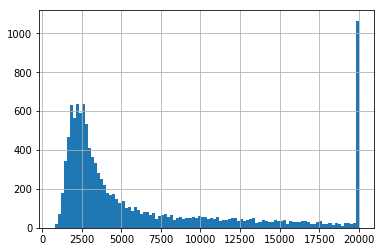

In [89]:
mac_df["Ellapsed"].hist(bins=100)

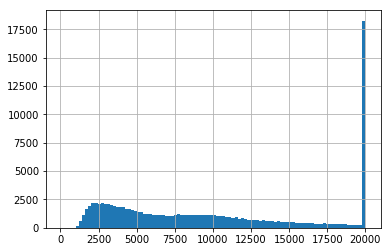

In [90]:
windows_df["Ellapsed"].hist(bins=100)

In [91]:
corr_matrix=linux_df.corr()
corr_matrix["Ellapsed"].sort_values(ascending=False)

Ellapsed       1.000000
AppVersion    -0.006198
TotalMemory   -0.196813
CPUCount      -0.248985
Platform            NaN
Name: Ellapsed, dtype: float64

In [92]:
corr_matrix=mac_df.corr()
corr_matrix["Ellapsed"].sort_values(ascending=False)

Ellapsed       1.000000
AppVersion    -0.058098
CPUCount      -0.199878
TotalMemory   -0.303232
Platform            NaN
Name: Ellapsed, dtype: float64

In [93]:
corr_matrix=windows_df.corr()
corr_matrix["Ellapsed"].sort_values(ascending=False)

Ellapsed       1.000000
AppVersion    -0.076004
CPUCount      -0.185342
TotalMemory   -0.187993
Platform            NaN
Name: Ellapsed, dtype: float64

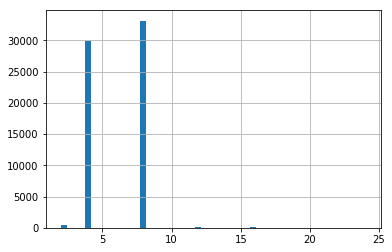

In [94]:
linux_df["CPUCount"].hist(bins=50)

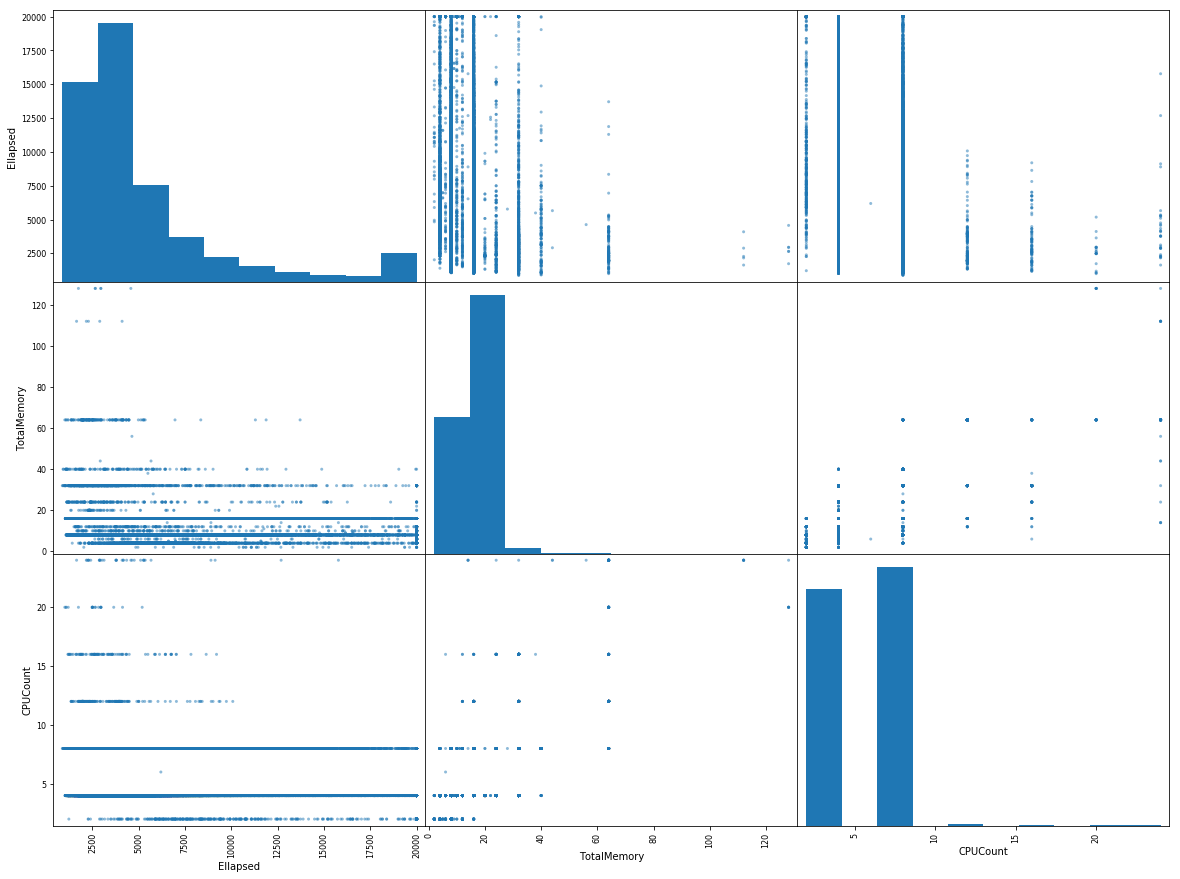

In [95]:
attributes = ["Ellapsed", "TotalMemory", "CPUCount"]
scatter_matrix(linux_df[attributes], figsize=(20,15))
plt.show()

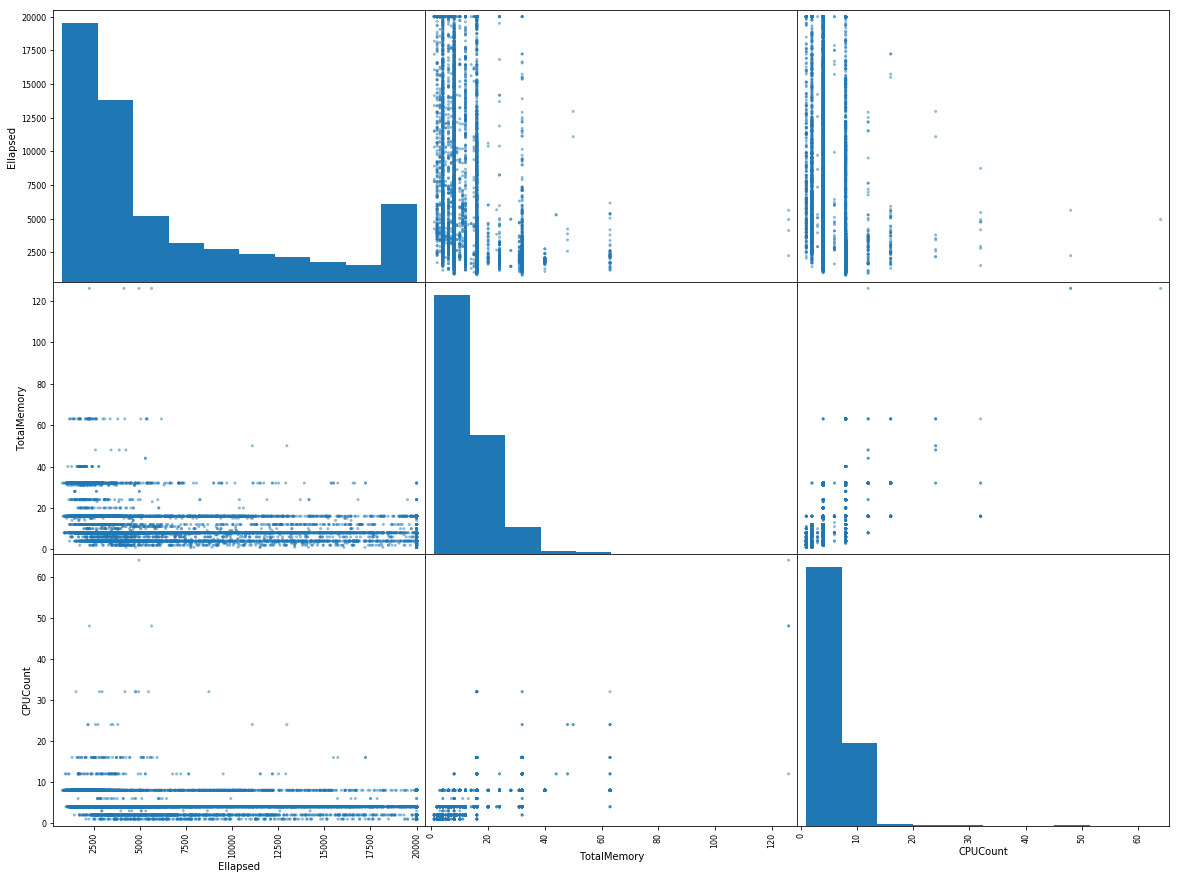

In [96]:
attributes = ["Ellapsed", "TotalMemory", "CPUCount"]
scatter_matrix(mac_df[attributes], figsize=(20,15))
plt.show()

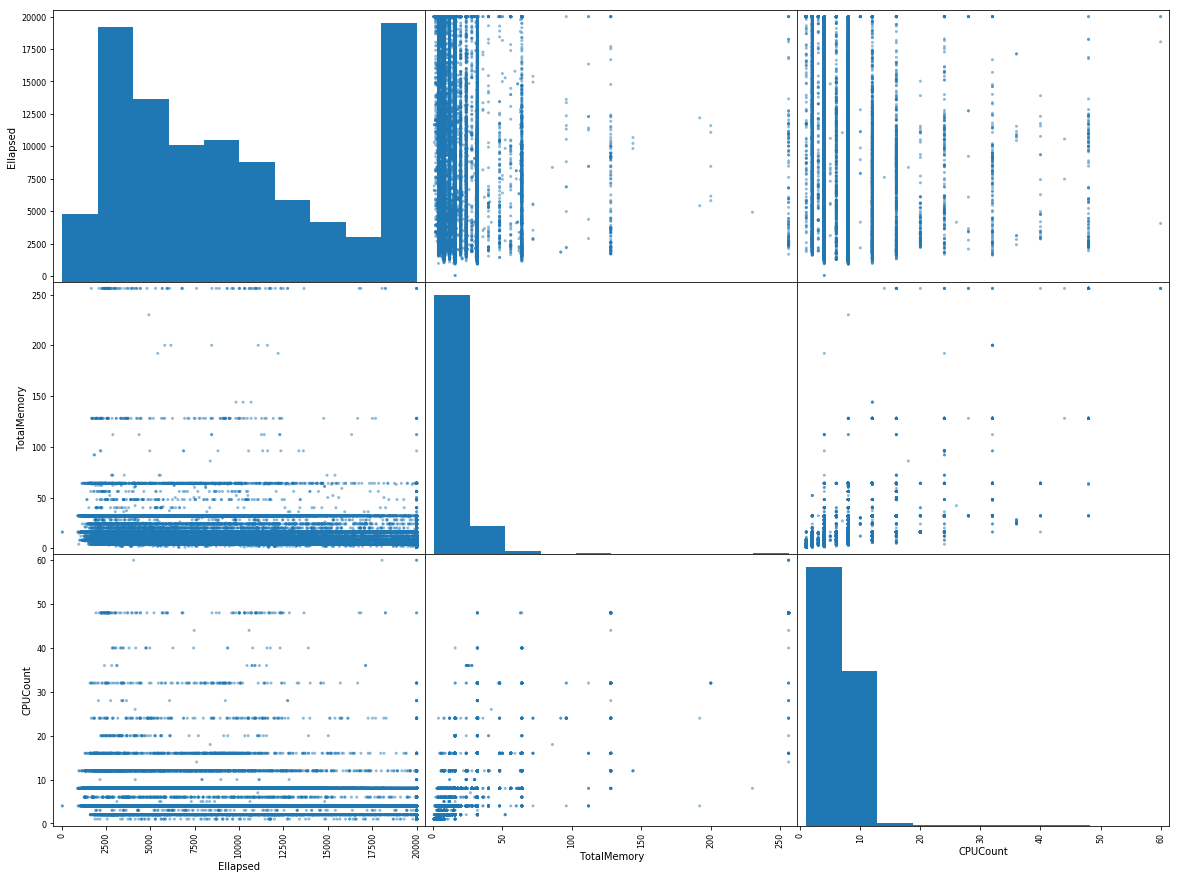

In [97]:
attributes = ["Ellapsed", "TotalMemory", "CPUCount"]
scatter_matrix(windows_df[attributes], figsize=(20,15))
plt.show()